In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Case Study

## Load the dataset

In [70]:
oil = pd.read_csv('./oil_prices.csv')
ingredient = pd.read_csv('./ingredient_prices.csv')

In [71]:
oil.count()

Date     8385
Price    8375
dtype: int64

In [72]:
ingredient.count()

Date     184
Price    183
dtype: int64

In [73]:
oil['Date'] = oil['Date'].astype('datetime64[ns]')
oil['Price'] = [float(str(i).replace(",", ".")) for i in oil['Price']]

In [74]:
ingredient['Date'] = ingredient['Date'].astype('datetime64[ns]')
ingredient['Price'] = [float(str(i).replace(",", ".")) for i in ingredient['Price']]

In [75]:
oil = oil[oil.Date >= '2005-01-01']

In [76]:
oil.shape

(3901, 2)

In [77]:
ingredient.head()

,Date,Price
0,2005-01-01,570.0
1,2005-02-01,570.0
2,2005-03-01,610.0
3,2005-04-01,600.0
4,2005-05-01,570.0


In [78]:
oil[oil.Price.isnull()]

,Date,Price
7753,2017-12-01,NaN
7754,2017-12-04,NaN
7755,2017-12-05,NaN
7756,2017-12-06,NaN
7757,2017-12-07,NaN
7758,2017-12-08,NaN
7759,2017-12-11,NaN
7760,2017-12-12,NaN
7761,2017-12-13,NaN
7762,2017-12-14,NaN


In [79]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3901 entries, 4484 to 8384
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3901 non-null   datetime64[ns]
 1   Price   3891 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 91.4 KB


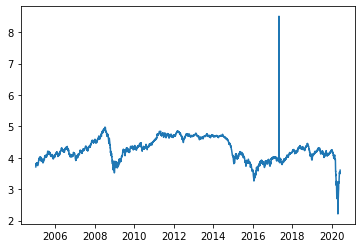

In [82]:
plt.plot(oil.Date, np.log(oil.Price))

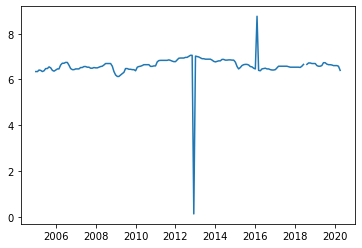

In [83]:
plt.plot(ingredient.Date, np.log(ingredient.Price))